# Working with real data

## Uploading small amount of data into memory

In [11]:
with open("res/Colors.txt",'r') as open_file :
    print('Colours.txt Content:\n' + open_file.read())

Colours.txt Content:
Color	Value
Red	1
Orange	2
Yellow	3
Green	4
Blue	5
Purple	6
Black	7
White	8


## Streaming large amounts of data into memory

In [12]:
with open("res/Colors.txt",'r') as open_file :
    for observation in open_file :
        print('Reading Data : ' + observation)

Reading Data : Color	Value

Reading Data : Red	1

Reading Data : Orange	2

Reading Data : Yellow	3

Reading Data : Green	4

Reading Data : Blue	5

Reading Data : Purple	6

Reading Data : Black	7

Reading Data : White	8


## Sampling data

In [6]:
n=2
with open("res/Colors.txt",'r') as open_file :
    for j, observation in enumerate(open_file) :
        if j % n != 0 :
            print('Reading line : ' + str(j) + '   Content: ' + observation)

Reading line : 1   Content: Red	1

Reading line : 3   Content: Yellow	3

Reading line : 5   Content: Blue	5

Reading line : 7   Content: Black	7



In [7]:
from random import random
sample_size = 0.25
with open("res/Colors.txt",'r') as open_file :
    for j, observation in enumerate(open_file) :
        if random() <= sample_size :
            print('Reading line : ' + str(j) + '   Content: ' + observation)

Reading line : 0   Content: Color	Value

Reading line : 1   Content: Red	1

Reading line : 5   Content: Blue	5

Reading line : 6   Content: Purple	6

Reading line : 8   Content: White	8


## Reading data from text file

In [35]:
import pandas as pd
color_table = pd.io.parsers.read_table("res/Colors.txt")
print(color_table)

    Color  Value
0     Red      1
1  Orange      2
2  Yellow      3
3   Green      4
4    Blue      5
5  Purple      6
6   Black      7
7   White      8


## Reading CSV delimited format

In [3]:
import pandas as pd
titanic = pd.io.parsers.read_csv("res/Titanic.csv")
x = titanic[['age']].values
print(x)

[[29.        ]
 [ 0.91670001]
 [ 2.        ]
 ...
 [26.5       ]
 [27.        ]
 [29.        ]]


## Reading Excel and other Microsoft Office files

In [5]:
import pandas as pd
xls = pd.ExcelFile("res/Values.xls")
trig_values = xls.parse('Sheet1', index_col = None, na_values = ['NA'])
print(trig_values)

    Angle (Degrees)      Sine    Cosine    Tangent
0        138.550574  0.661959 -0.749540  -0.883153
1        305.535745 -0.813753  0.581211  -1.400100
2        280.518695 -0.983195  0.182556  -5.385709
3        216.363795 -0.592910 -0.805269   0.736289
4         36.389247  0.593268  0.805005   0.736974
..              ...       ...       ...        ...
67       324.199562 -0.584964  0.811059  -0.721234
68       187.948172 -0.138277 -0.990394   0.139619
69       270.678249 -0.999930  0.011837 -84.472139
70       270.779159 -0.999908  0.013598 -73.530885
71       200.213513 -0.345520 -0.938412   0.368196

[72 rows x 4 columns]


In [26]:
import pandas as pd
xls = pd.read_excel("res/Values.xls")
print(xls)

    Angle (Degrees)      Sine    Cosine    Tangent
0        138.550574  0.661959 -0.749540  -0.883153
1        305.535745 -0.813753  0.581211  -1.400100
2        280.518695 -0.983195  0.182556  -5.385709
3        216.363795 -0.592910 -0.805269   0.736289
4         36.389247  0.593268  0.805005   0.736974
..              ...       ...       ...        ...
67       324.199562 -0.584964  0.811059  -0.721234
68       187.948172 -0.138277 -0.990394   0.139619
69       270.678249 -0.999930  0.011837 -84.472139
70       270.779159 -0.999908  0.013598 -73.530885
71       200.213513 -0.345520 -0.938412   0.368196

[72 rows x 4 columns]


## Sending Data in Unstructured File Form
## (Rendering the image)

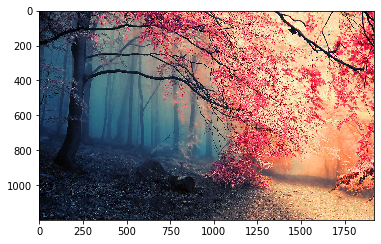

In [6]:
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm
example_file = ("res/Earth Forest.jpg")
image = imread(example_file, as_gray = False)
plt.imshow(image, cmap = cm.gray)
plt.show()

## Online image

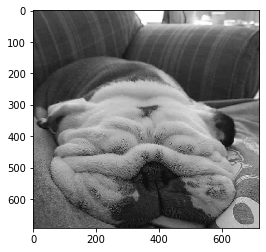

In [11]:
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm
example_file = ("https://i.imgur.com/xhuP5MK.jpeg")
image_o = imread(example_file, as_gray = True)
plt.imshow(image_o, cmap = cm.gray)
plt.show()

## Shaping image
## Displaying the image information

In [12]:
print("data type: %s , shape: %s " % (type(image),image.shape))
print("For online image, data type: %s , shape: %s " % (type(image_o),image_o.shape))

data type: <class 'numpy.ndarray'> , shape: (1200, 1920) 
For online image, data type: <class 'numpy.ndarray'> , shape: (692, 720) 


## Cropping image

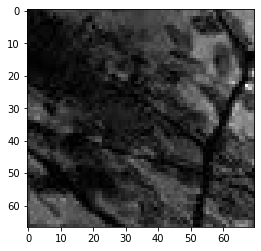

In [28]:
image2 = image[3:70, 0:70]
plt.imshow(image2, cmap = cm.gray)
plt.show()

## Resizing image

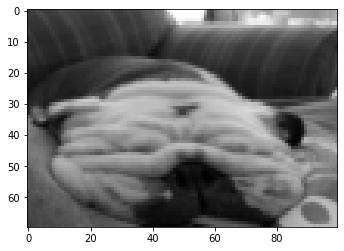

data type: <class 'numpy.ndarray'> , shape: (70, 100)


In [34]:
image3 = resize(image_o,(70,100),mode = 'edge')
plt.imshow(image3,cmap = cm.gray)
plt.show()
print("data type: %s , shape: %s" % (type(image3),image3.shape))

## Flatening the image

In [40]:
image_row = image3.flatten()
print("data type: %s , shape: %s " % (type(image_row),image_row.shape))

data type: <class 'numpy.ndarray'> , shape: (7000,) 


## Read the data from XMLData.xml

In [34]:
from lxml import objectify
import pandas as pd

xml = objectify.parse(open('res/XMLData.xml'))
root = xml.getroot()
df = pd.DataFrame(columns=('Number', 'String', 'Boolean'))

for i in range(0,4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'String', 'Boolean'],
    [obj[0].text, obj[1].text,
    obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
print(df)

  Number  String Boolean
0      1   First    True
1      2  Second   False
2      3   Third    True
3      4  Fourth   False
